In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from fly2p_function_TQ.imaging_2p_bar_juimping_analysis import run_bar_jumping_analysis_across_trial,plot_the_aligned_bar_jump_trial,sliding_circular_mean

In [3]:
jump_data = run_bar_jumping_analysis_across_trial('/home/tianhaoqiu/Documents/GitHub/2p_analysis/preprocessing_output/normalized/dual_imaging/R55G08_syt7f_R27F02_lexopjRGECO1a(bar_jump)','/home/tianhaoqiu/Documents/GitHub/2p_analysis/preprocessing_output/normalized/dual_imaging/R55G08_syt7f_R27F02_lexopjRGECO1a(bar_jump)/jumping_frame',1,"TQfly")

In [4]:
volume_time = jump_data['volume_time'] 

In [5]:
time_array = np.arange(jump_data['output_PVA_radian_pooled'].shape[1])*volume_time

In [6]:
jump_data.keys()

dict_keys(['output_PVA_radian_pooled', 'output_bar_PVA_offset_pooled', 'output_PVA_strength_pooled', 'output_PVA_strength_z', 'output_bar_jumping_stop_stamp_pooled', 'stop_s_before_jump', 'circular_variance', 'circular_mean_before_jump', 'offset_return_time', 'Angular_speed', 'Forward_speed', 'output_flytrial', 'volume_time', 'Angular_speed_during_offset_return', 'output_PVA_radian_pooled_red', 'output_bar_PVA_red_offset_pooled', 'output_PVA_strength_pooled_red', 'output_greed_red_PVA_offset', 'circular_variance_red', 'PVA_strength_ratio'])

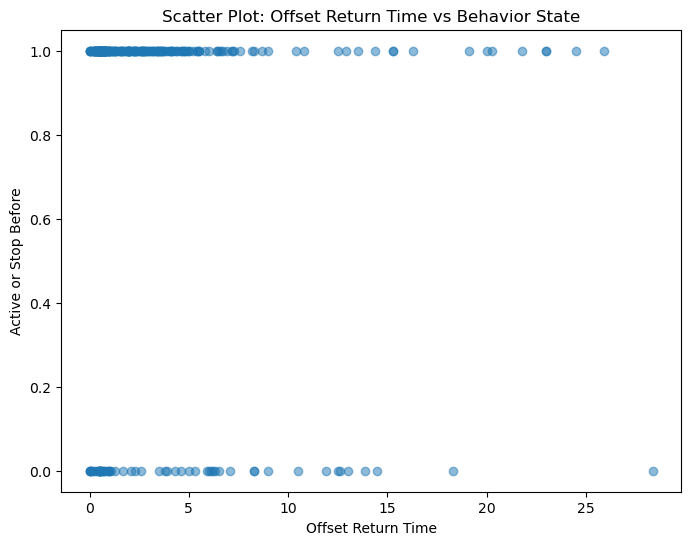

In [7]:
import matplotlib.pyplot as plt

# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
whether_active= jump_data['output_bar_jumping_stop_stamp_pooled']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(offset_return_time, whether_active, alpha=0.5)

# Add labels and title
plt.xlabel('Offset Return Time')
plt.ylabel('Active or Stop Before')
plt.title('Scatter Plot: Offset Return Time vs Behavior State')

# Show the plot
plt.show()

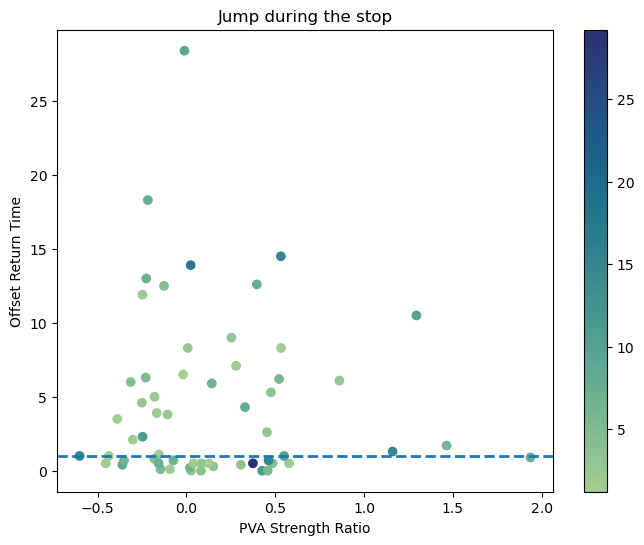

In [35]:

# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
jumping_stop_stamp = jump_data['output_bar_jumping_stop_stamp_pooled']
stop_duration_before = jump_data['stop_s_before_jump']
# Filter the data based on jumping_stop_stamp == 1
filtered_offset_return_time = offset_return_time[jumping_stop_stamp == 0]
filtered_PVA_strength_ratio = PVA_strength_ratio[jumping_stop_stamp == 0]
filtered_stop_duration_before = stop_duration_before[jumping_stop_stamp == 0]


# Create a scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(filtered_PVA_strength_ratio,filtered_offset_return_time, c=filtered_stop_duration_before, cmap='crest', alpha=1)

# Add a colorbar
cbar = plt.colorbar(sc)

# Add labels and title
plt.xlabel('PVA Strength Ratio')
plt.ylabel('Offset Return Time')
plt.axhline(y= 1,linestyle ='--', linewidth =2)
plt.title('Jump during the stop')

# Show the plot
plt.show()

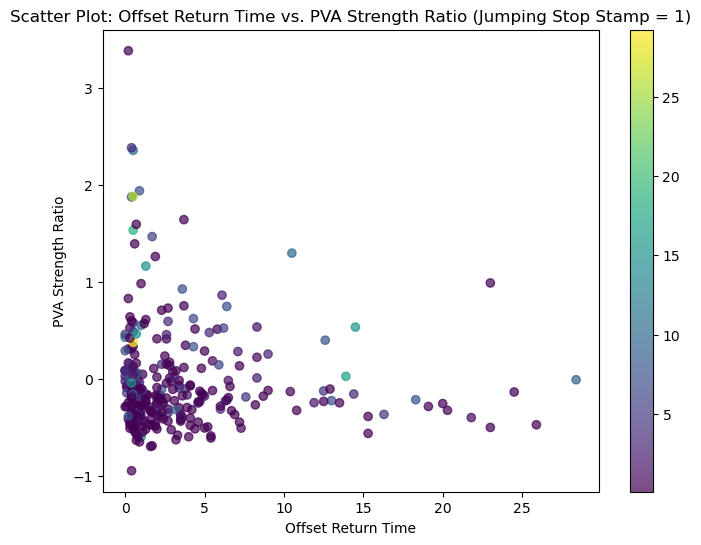

In [32]:
# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
jumping_stop_stamp = jump_data['output_bar_jumping_stop_stamp_pooled']
stop_duration_before = jump_data['stop_s_before_jump']

# Create a scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(offset_return_time, PVA_strength_ratio, c=stop_duration_before, cmap='viridis', alpha=0.7)

# Add a colorbar
cbar = plt.colorbar(sc)

# Add labels and title
plt.xlabel('Offset Return Time')
plt.ylabel('PVA Strength Ratio')
plt.title('Scatter Plot: Offset Return Time vs. PVA Strength Ratio (Jumping Stop Stamp = 1)')

# Show the plot
plt.show()

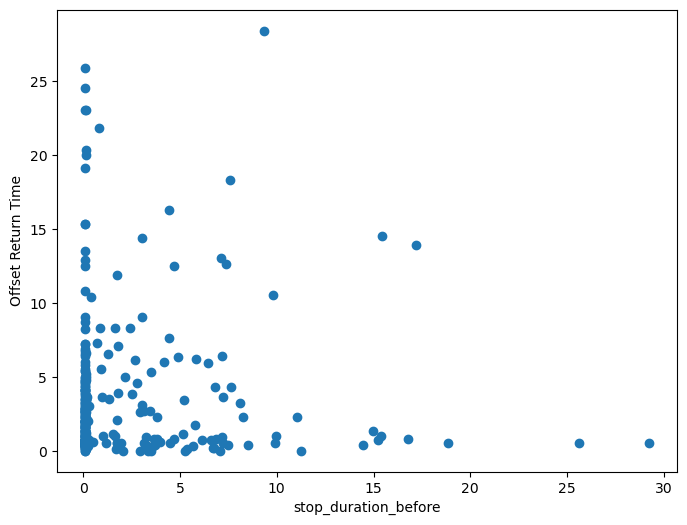

In [10]:
# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
PVA_strength_ratio = jump_data['PVA_strength_ratio']
jumping_stop_stamp = jump_data['output_bar_jumping_stop_stamp_pooled']
stop_duration_before = jump_data['stop_s_before_jump']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(stop_duration_before, offset_return_time)


# Add labels and title
plt.xlabel('stop_duration_before')
plt.ylabel('Offset Return Time')
#plt.title('Scatter Plot: Offset Return Time vs. PVA Strength Ratio ')

# Show the plot
plt.show()

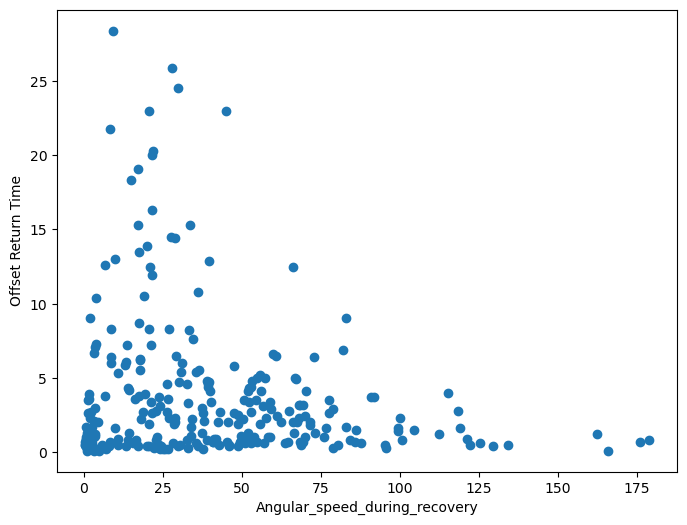

In [13]:
# Extract the columns from the DataFrame
offset_return_time = jump_data['offset_return_time']
Angular_speed_during_recovery = jump_data['Angular_speed_during_offset_return']
stop_duration_before = jump_data['stop_s_before_jump']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Angular_speed_during_recovery, offset_return_time)


# Add labels and title
plt.xlabel('Angular_speed_during_recovery')
plt.ylabel('Offset Return Time')
#plt.title('Scatter Plot: Offset Return Time vs. PVA Strength Ratio ')

# Show the plot
plt.show()

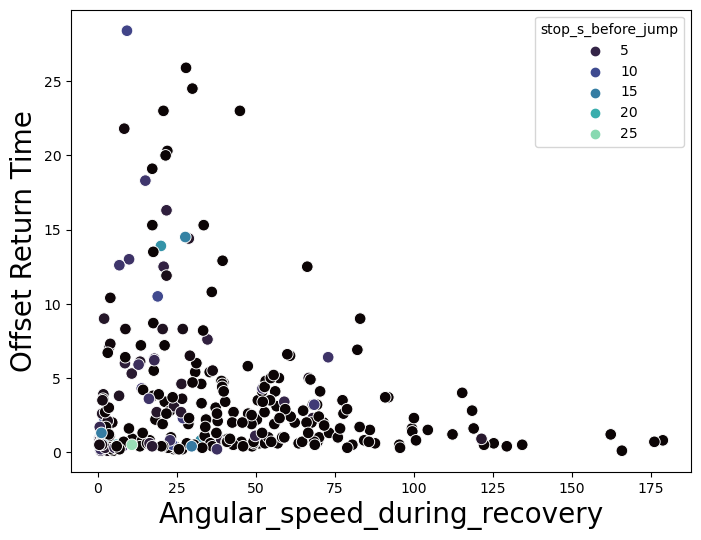

In [31]:
plt.figure(figsize= (8,6))
# Assuming they are 2D arrays, extract the first column if necessary
stop_s_before_jump = jump_data['stop_s_before_jump'].squeeze()
offset_return_time = jump_data['offset_return_time'].squeeze()
PVA_strength_ratio = jump_data['PVA_strength_ratio'].squeeze()
Angular_speed_during_recovery = jump_data['Angular_speed_during_offset_return'].squeeze()


# Combine the data into a DataFrame
data = {
    'stop_s_before_jump': stop_s_before_jump,
    'offset_return_time': offset_return_time,
    'PVA_strength_ratio': PVA_strength_ratio,
    'Angular_speed_during_recovery': Angular_speed_during_recovery
}
df = pd.DataFrame(data)

# Create the scatter plot
cmap = sns.color_palette("mako", as_cmap=True)
snsplot = sns.scatterplot(data=df, x='Angular_speed_during_recovery', y='offset_return_time', s=70, hue='stop_s_before_jump', palette=cmap)

# Add title and labels
plt.xlabel('Angular_speed_during_recovery', fontsize=20)
plt.ylabel('Offset Return Time', fontsize=20)

# Show the plot
plt.show()

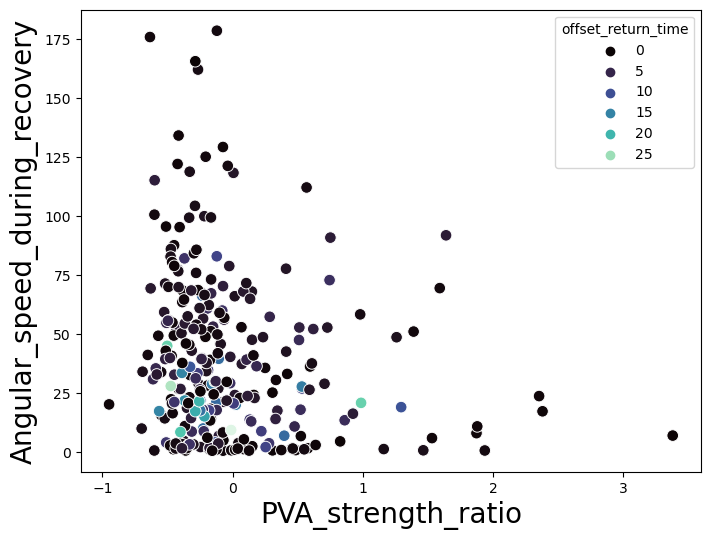

In [28]:
plt.figure(figsize= (8,6))
# Assuming they are 2D arrays, extract the first column if necessary
stop_s_before_jump = jump_data['stop_s_before_jump'].squeeze()
offset_return_time = jump_data['offset_return_time'].squeeze()
PVA_strength_ratio = jump_data['PVA_strength_ratio'].squeeze()
Angular_speed_during_recovery = jump_data['Angular_speed_during_offset_return'].squeeze()


# Combine the data into a DataFrame
data = {
    'stop_s_before_jump': stop_s_before_jump,
    'offset_return_time': offset_return_time,
    'PVA_strength_ratio': PVA_strength_ratio,
    'Angular_speed_during_recovery': Angular_speed_during_recovery
}
df = pd.DataFrame(data)

# Create the scatter plot
cmap = sns.color_palette("mako", as_cmap=True)
snsplot = sns.scatterplot(data=df, x='PVA_strength_ratio', y='Angular_speed_during_recovery', s=70, hue='offset_return_time', palette=cmap)

# Add title and labels
plt.xlabel('PVA_strength_ratio', fontsize=20)
plt.ylabel('Angular_speed_during_recovery', fontsize=20)

# Show the plot
plt.show()

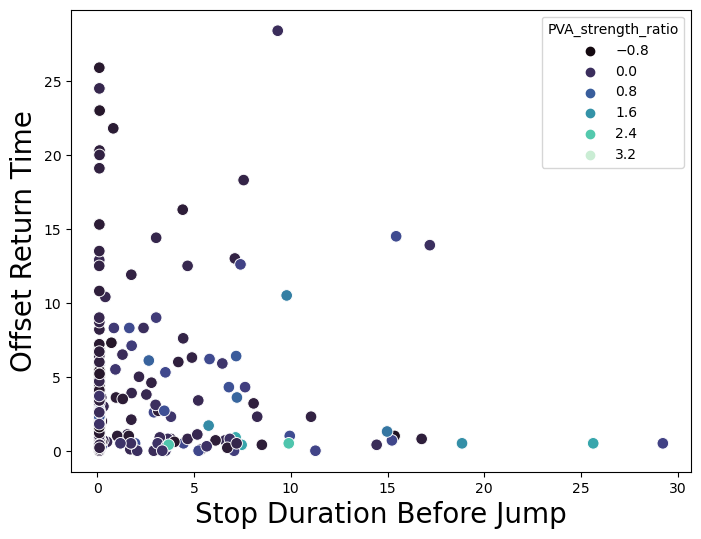

In [30]:
plt.figure(figsize= (8,6))
# Assuming they are 2D arrays, extract the first column if necessary
stop_s_before_jump = jump_data['stop_s_before_jump'].squeeze()
offset_return_time = jump_data['offset_return_time'].squeeze()
PVA_strength_ratio = jump_data['PVA_strength_ratio'].squeeze()


# Combine the data into a DataFrame
data = {
    'stop_s_before_jump': stop_s_before_jump,
    'offset_return_time': offset_return_time,
    'PVA_strength_ratio': PVA_strength_ratio
}
df = pd.DataFrame(data)

# Create the scatter plot
cmap = sns.color_palette("mako", as_cmap=True)
snsplot = sns.scatterplot(data=df, x='stop_s_before_jump', y='offset_return_time', s=70, hue='PVA_strength_ratio',palette=cmap)

# Add title and labels
plt.xlabel('Stop Duration Before Jump', fontsize=20)
plt.ylabel('Offset Return Time', fontsize=20)

# Show the plot
plt.show()


In [12]:
from scipy.stats import pearsonr
# Calculate the Pearson correlation coefficient
r, p_value = pearsonr(df['stop_s_before_jump'], df['offset_return_time'])
print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

ValueError: array must not contain infs or NaNs

In [15]:
from scipy.stats import circvar
from scipy.stats import circmean
circmean(test,high=np.pi, low= -np.pi)

2.751481673061037

In [13]:
# Calculate the raw difference between consecutive frames
test=np.hstack(jump_data['circular_mean_before_jump'].values)
diff = np.diff(test, axis=-1)
# Adjust the differences to be within the range -π to π
diff = (diff + np.pi) % (2 * np.pi) - np.pi

In [10]:
diff

array([ 0.26608708, -1.23760049,  1.27552105, -0.35718583, -0.42345524,
        0.44502681, -0.09202251, -0.29448578,  1.5626423 ])

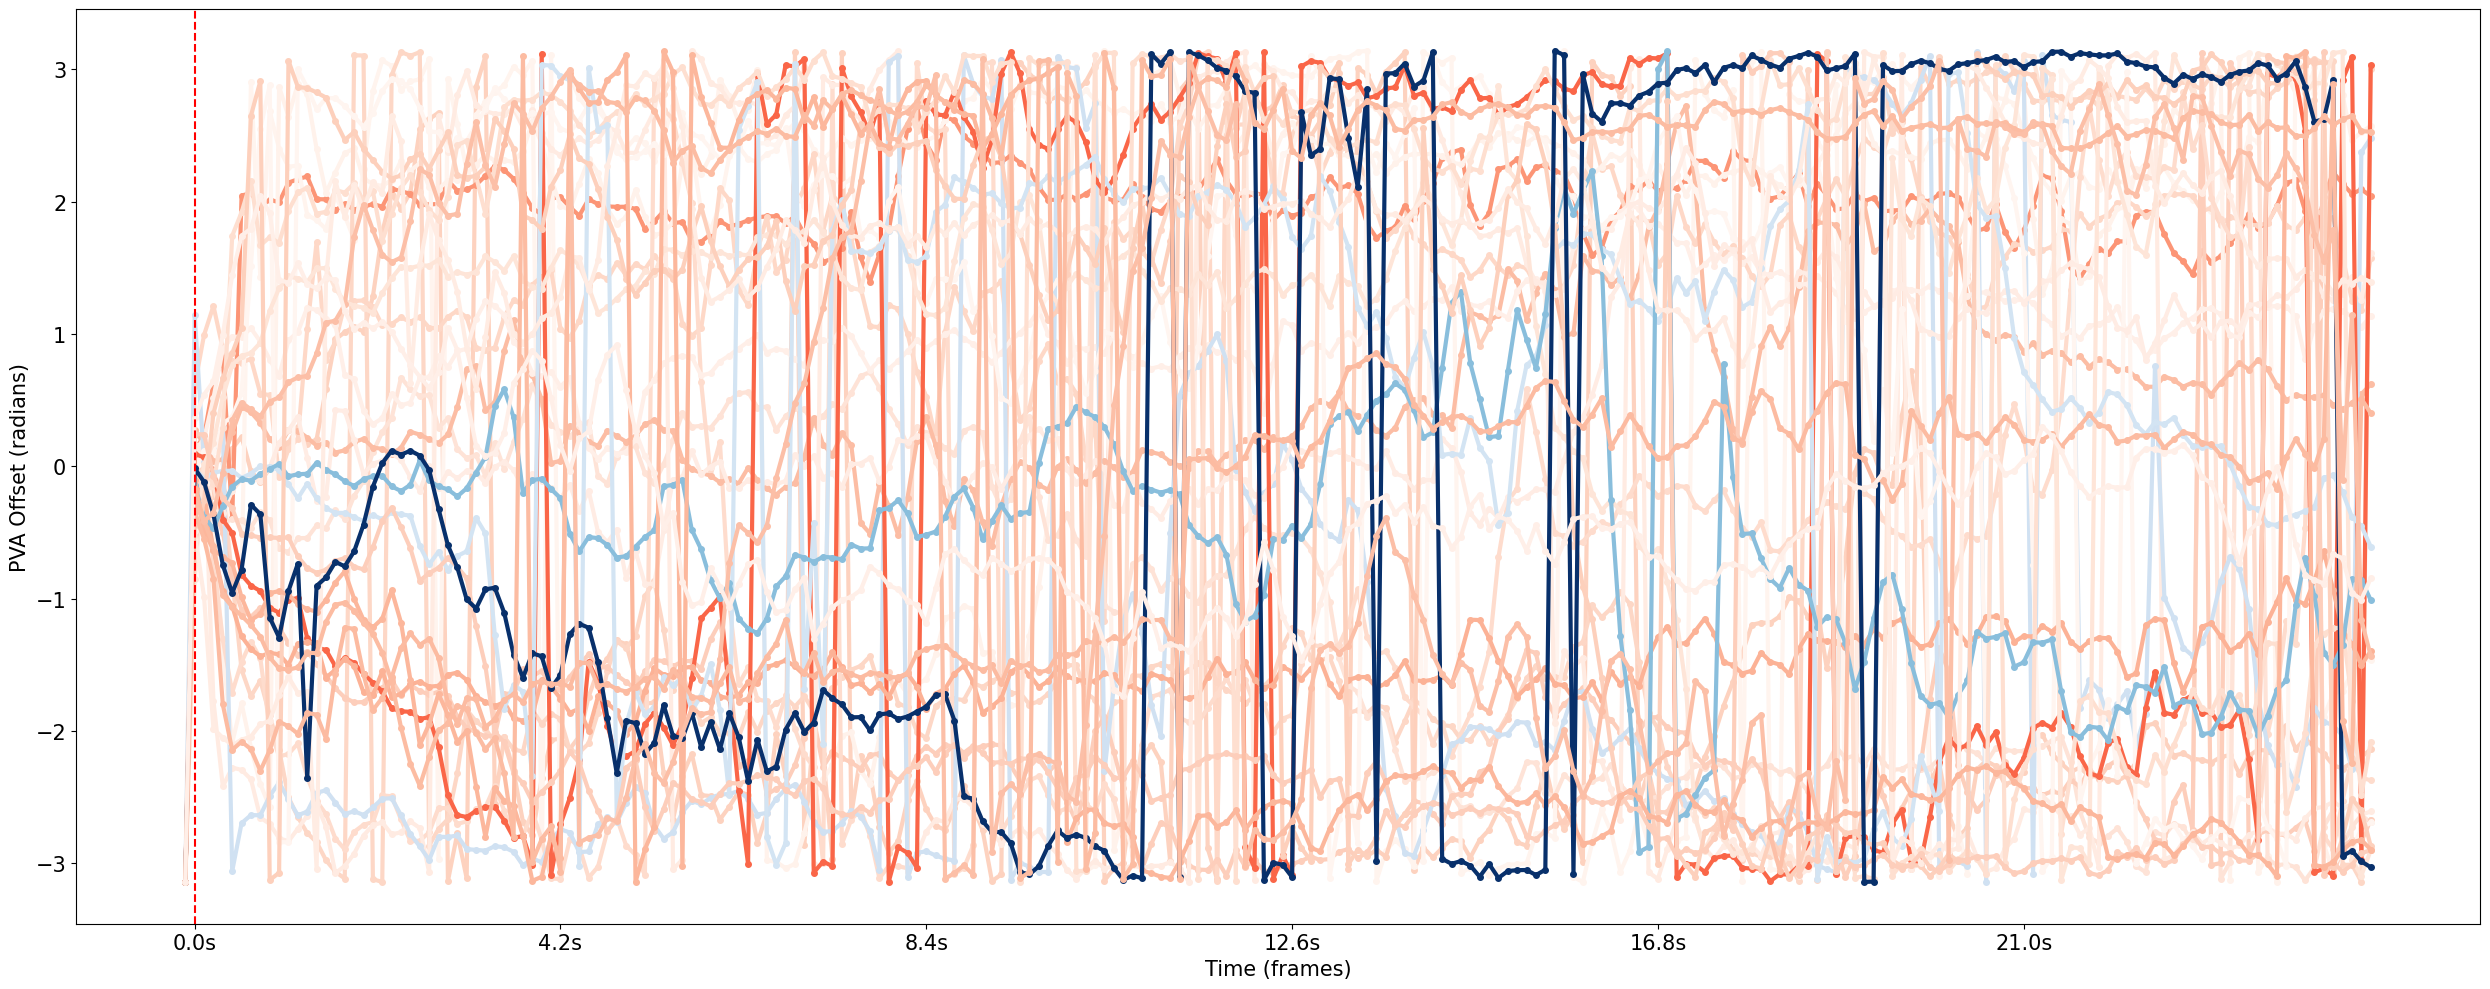

In [55]:
plot_the_aligned_bar_jump_trial(jump_data['output_bar_PVA_offset_pooled'],1,1,-np.pi,jump_data['stop_s_before_jump'],jump_data['PVA_strength_ratio'],1,jump_data['output_bar_jumping_stop_stamp_pooled'],volume_time,s_after_jump = 25)

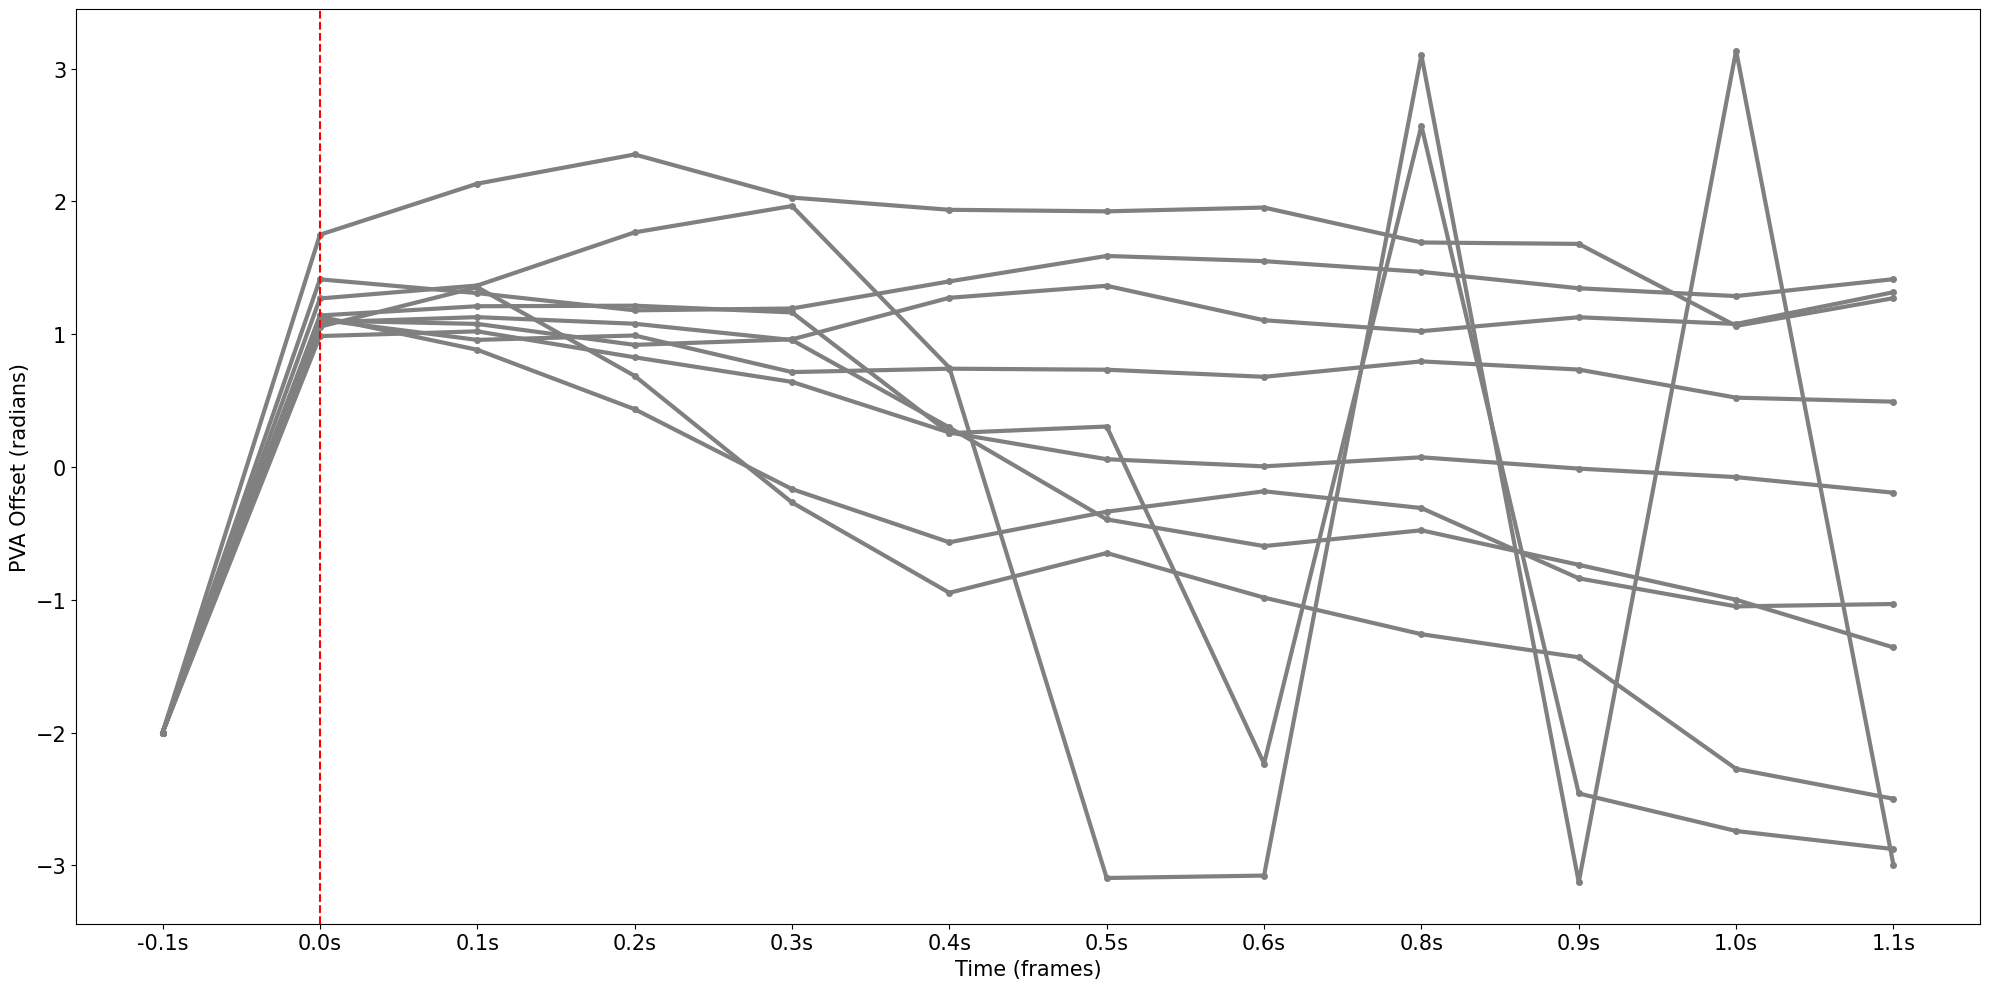

In [11]:
# Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_bar_PVA_offset_pooled']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = -2
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    

# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

# Normalize the stop_duration values to range between 0 and 1 for colormap
stop_duration = jump_data['stop_s_before_jump'].values
norm = plt.Normalize(stop_duration.min(), stop_duration.max())
# Create a monochromatic colormap
colormap = matplotlib.colormaps['Reds']

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    color = colormap(norm(stop_duration[i]))
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = color)
    else:
        plt.plot(range(-1, 11  ), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
#plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

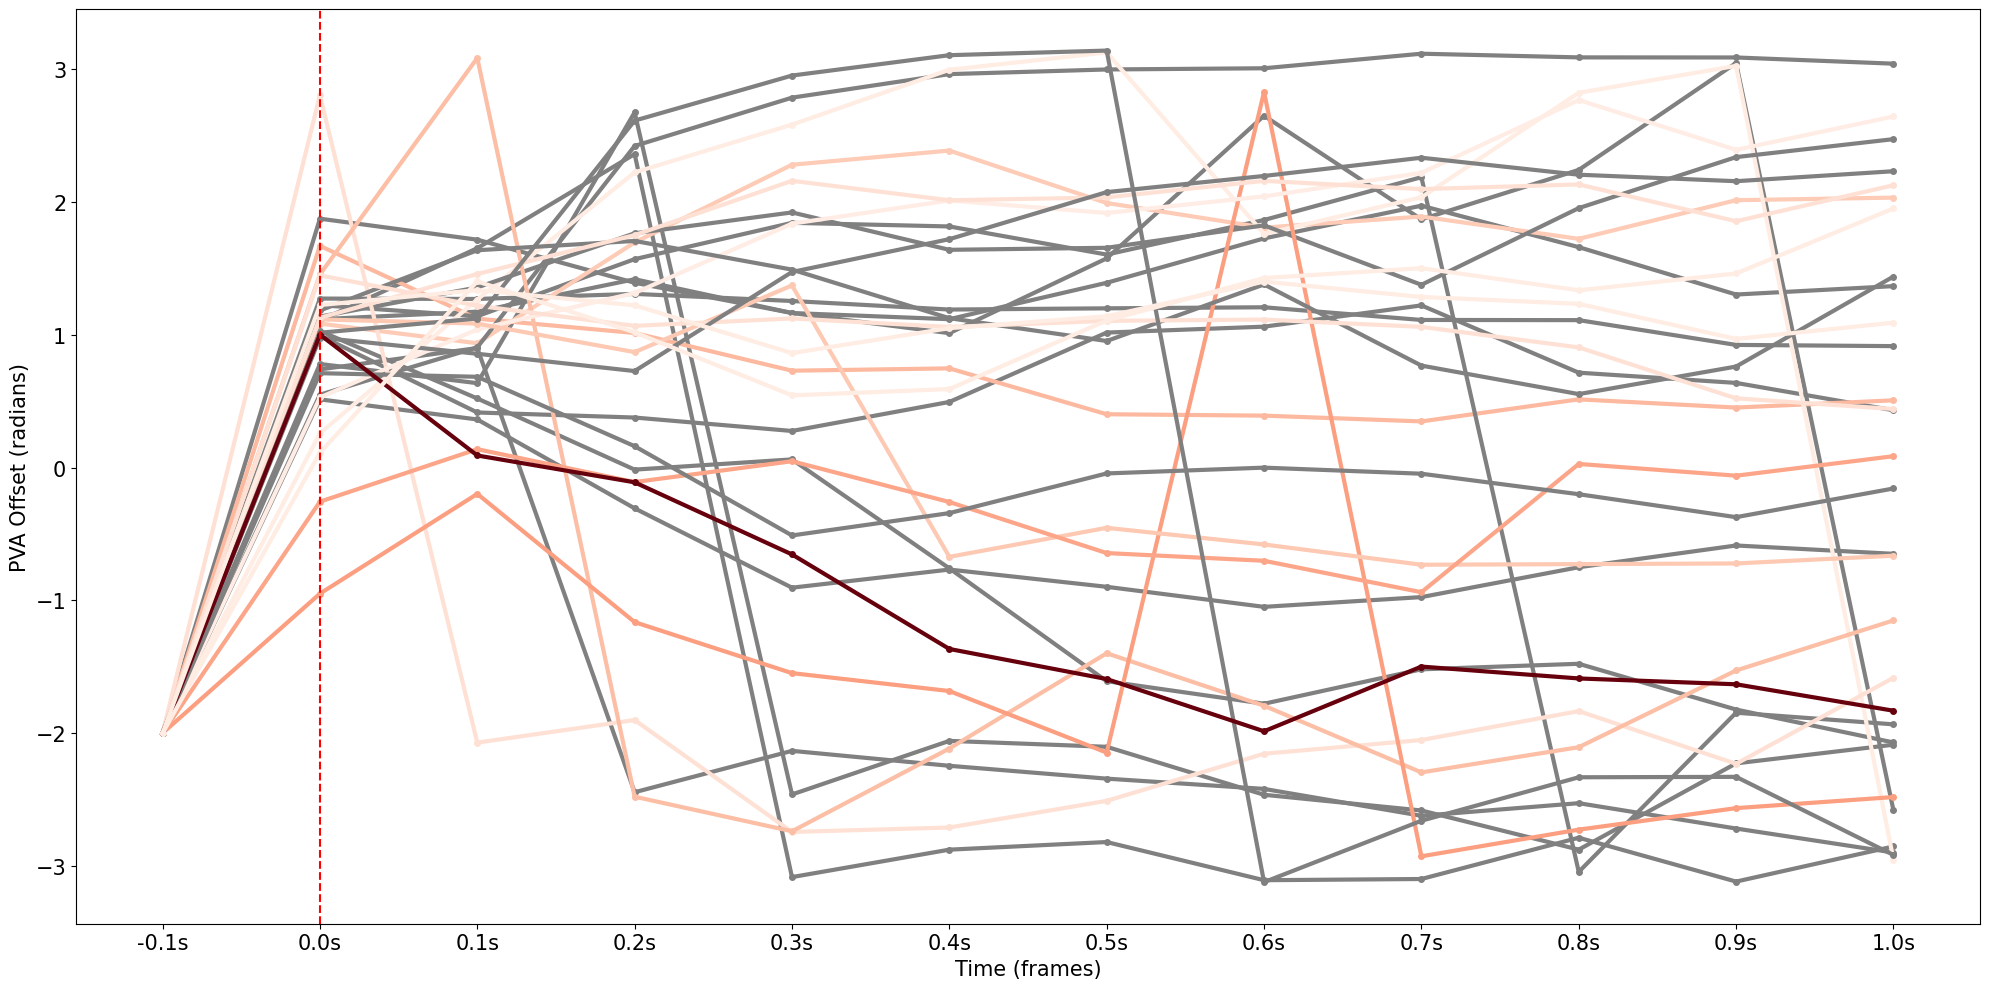

In [91]:
# Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_bar_PVA_red_offset_pooled']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = -2
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    
    
# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame


# Normalize the stop_duration values to range between 0 and 1 for colormap
stop_duration = jump_data['stop_s_before_jump'].values
norm = plt.Normalize(stop_duration.min(), stop_duration.max())
# Create a colormap (you can choose any colormap you prefer)
colormap = matplotlib.colormaps['Reds']


# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    color = colormap(norm(stop_duration[i]))
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = color)
    else:
        plt.plot(range(-1,11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
#plt.title(f"Aligned {data.name}",fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

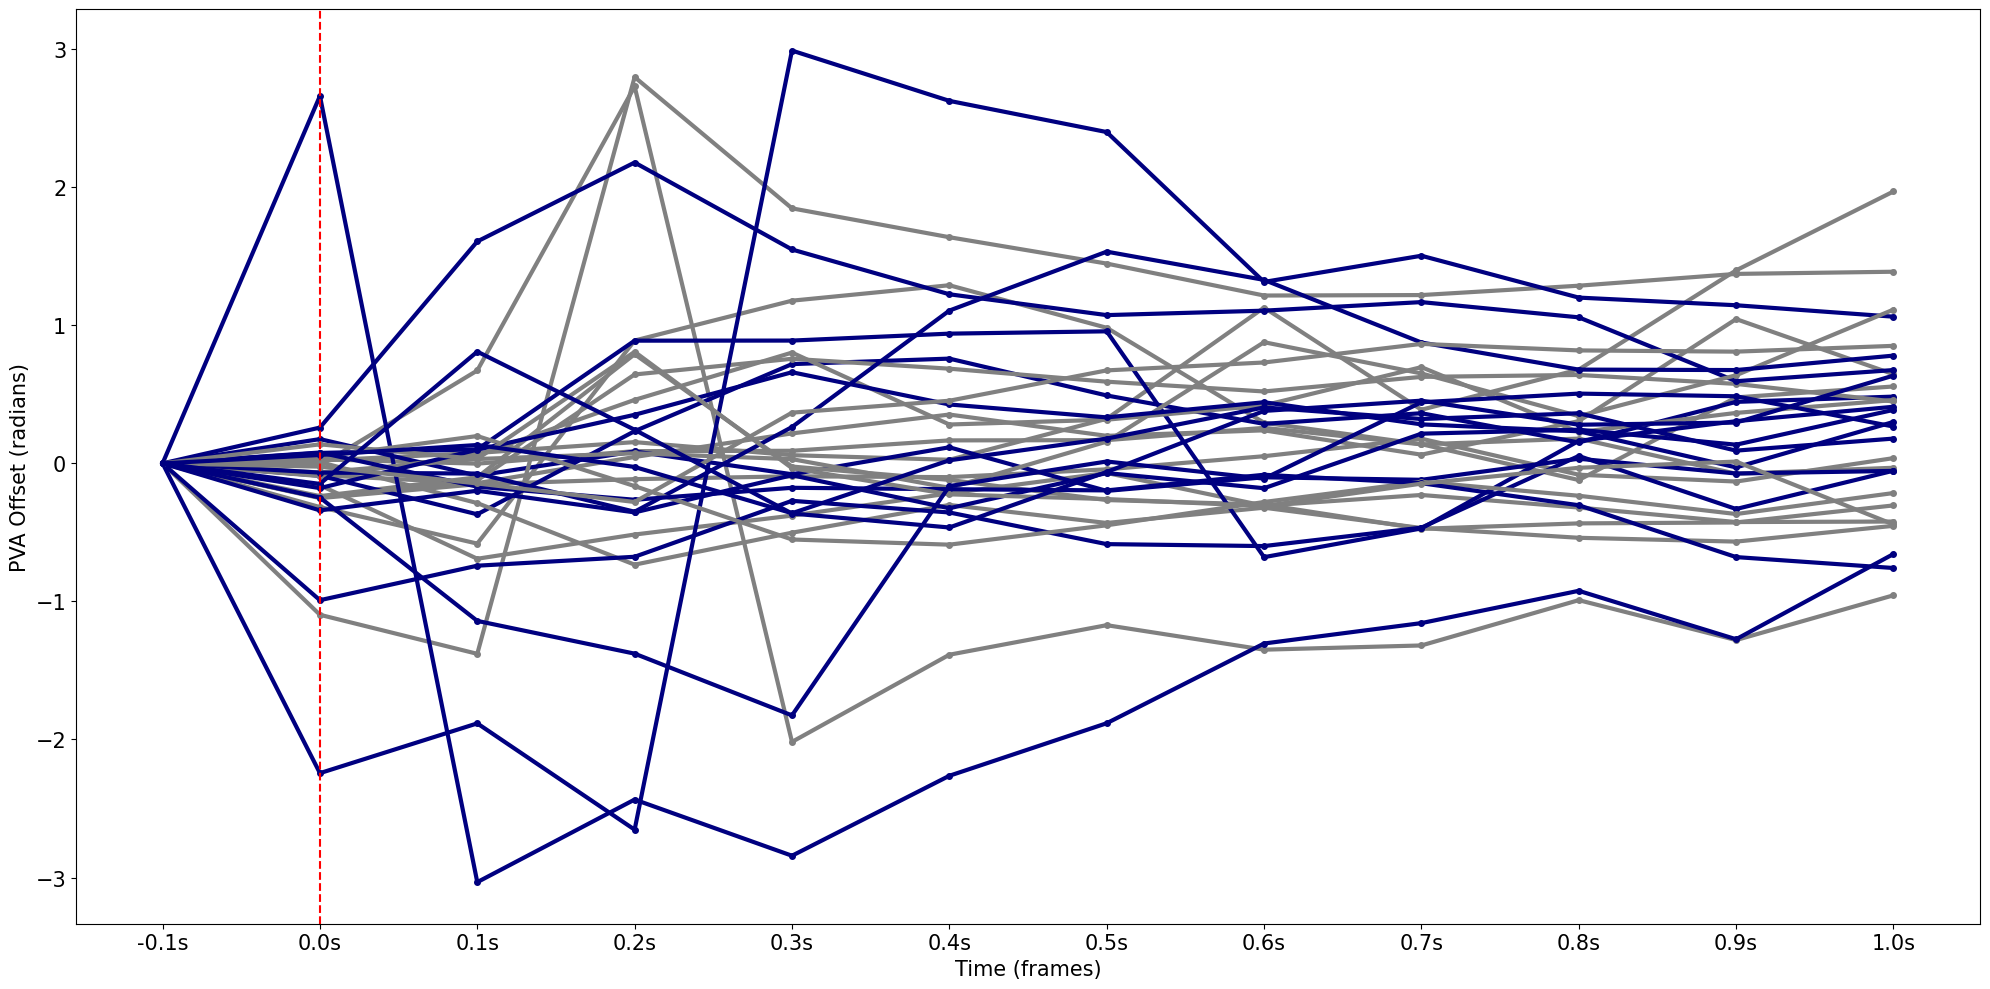

In [92]:
# Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_greed_red_PVA_offset']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = 0
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    
    
# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'navy')
    else:
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
#plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

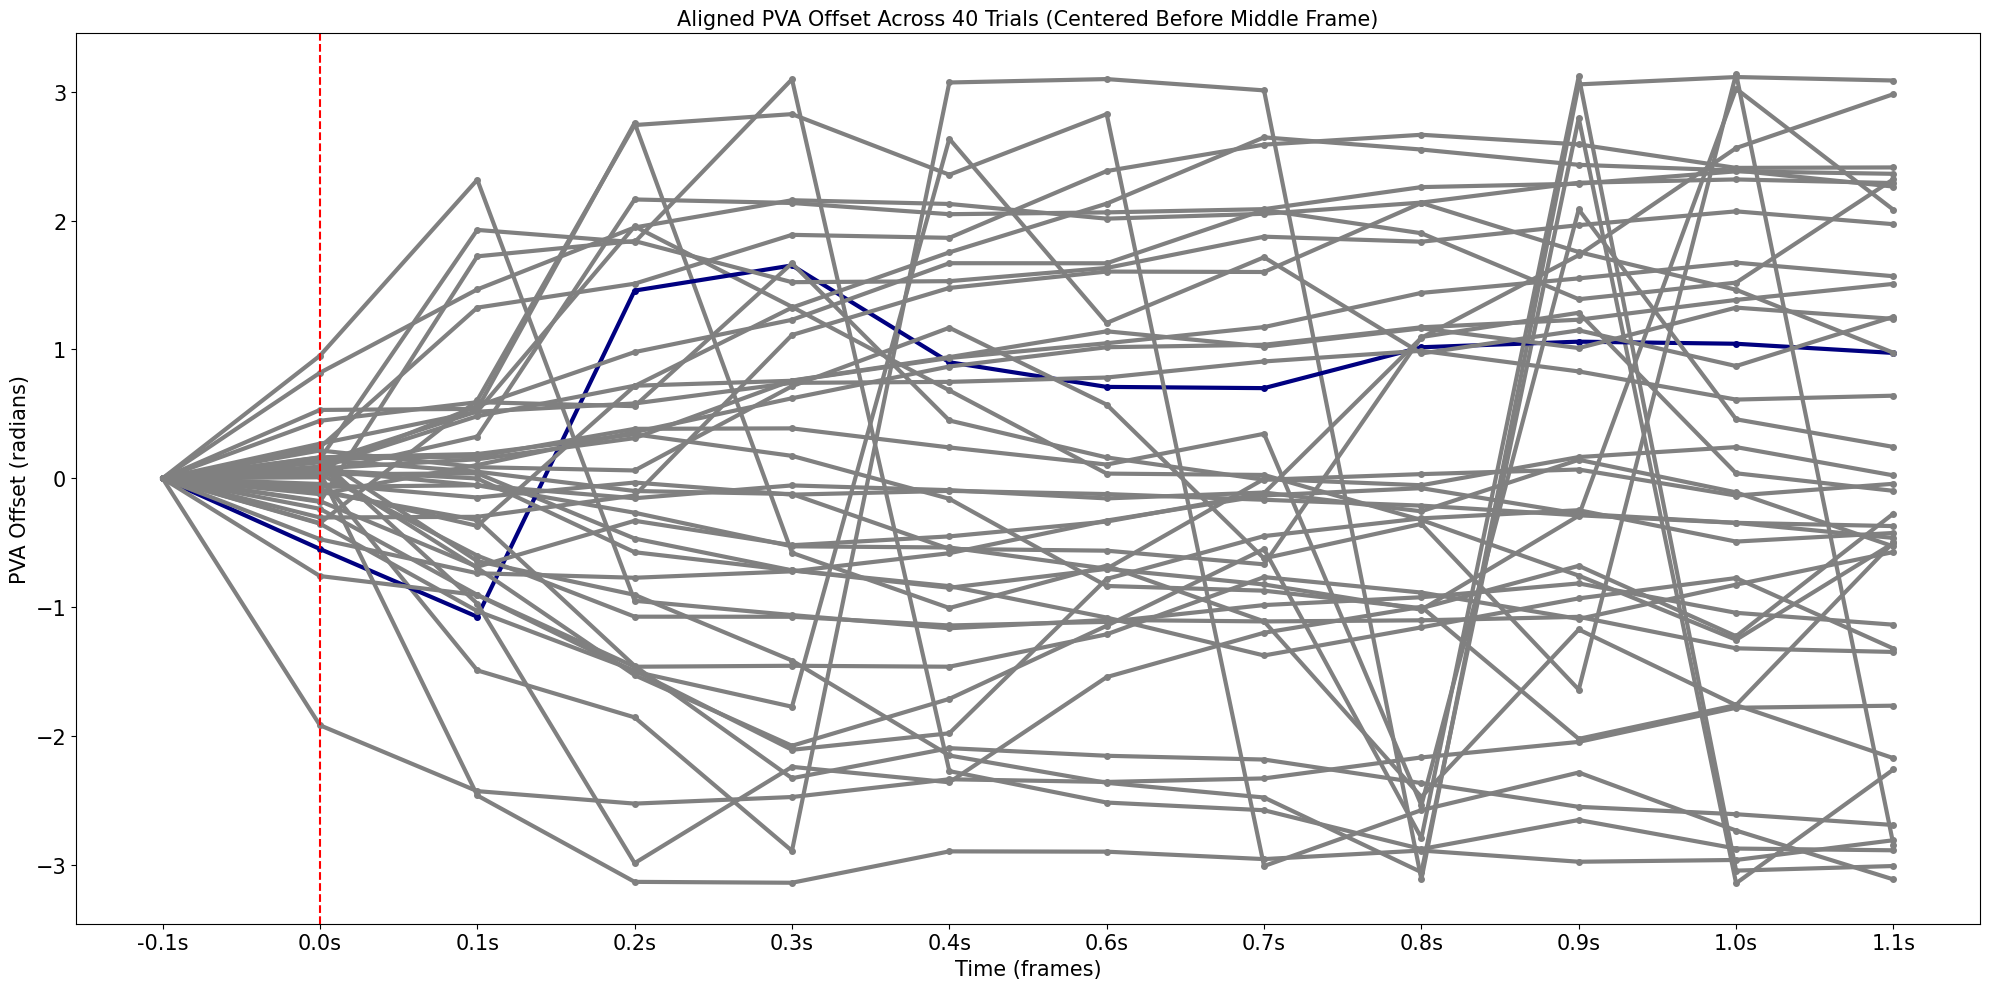

In [81]:
# Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_PVA_radian_pooled_red']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = 0
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    
    
# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'navy')
    else:
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

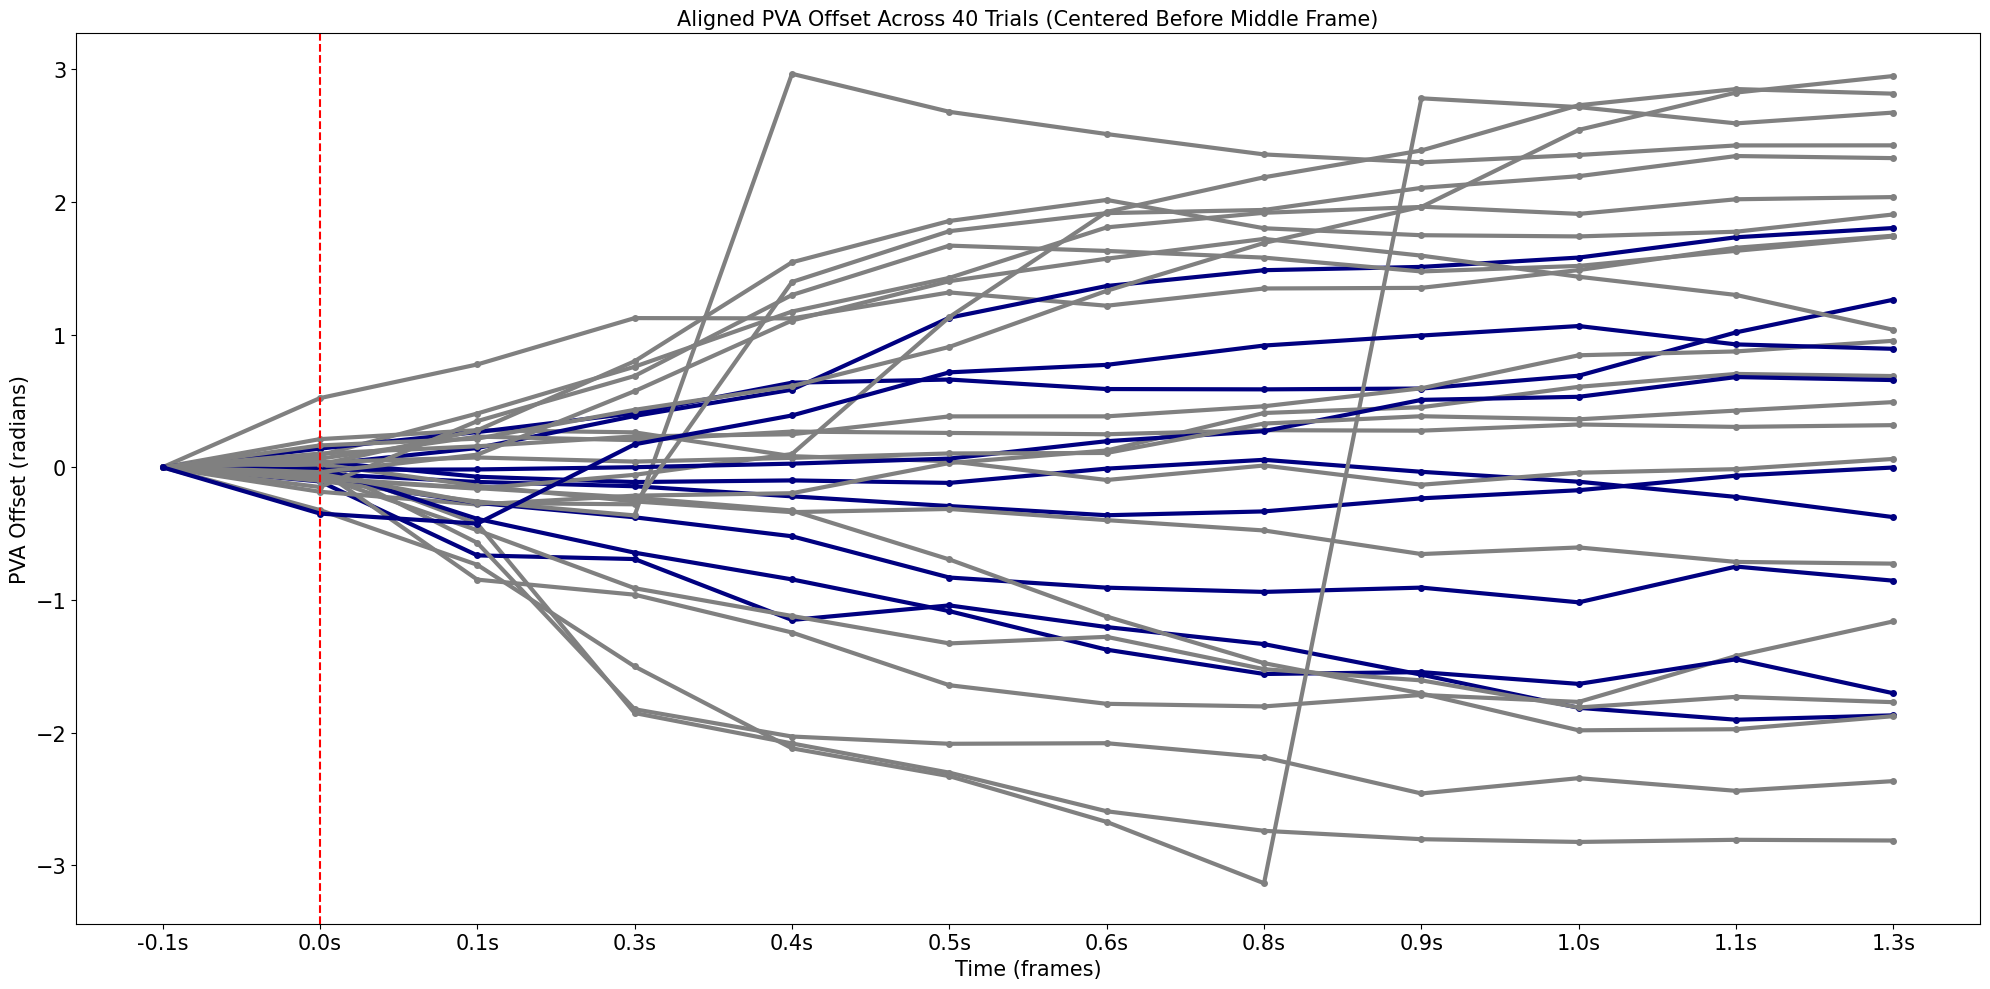

In [20]:
 # Function to shift the data circularly
def shift_circular(data, shift_amount):
    return np.mod(data + shift_amount + np.pi, 2 * np.pi) - np.pi

# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['output_PVA_radian_pooled']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]

# Calculate the shift required for each trial to align the value at the frame before the middle to -2
target_value = 0
shifts = target_value - frame_before_middle_values

# Ensure the shifts remain within the range from -π to π
shifts = np.mod(shifts + np.pi, 2 * np.pi) - np.pi


# Align the trials by shifting them circularly
aligned_data = np.zeros_like(data)
for i in range(data.shape[0]):
    aligned_data[i, :] = shift_circular(data.iloc[i, :], shifts[i])   
    
    
# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(aligned_data.shape[0]):
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'navy')
    else:
        plt.plot(range(-1, 11), aligned_data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()

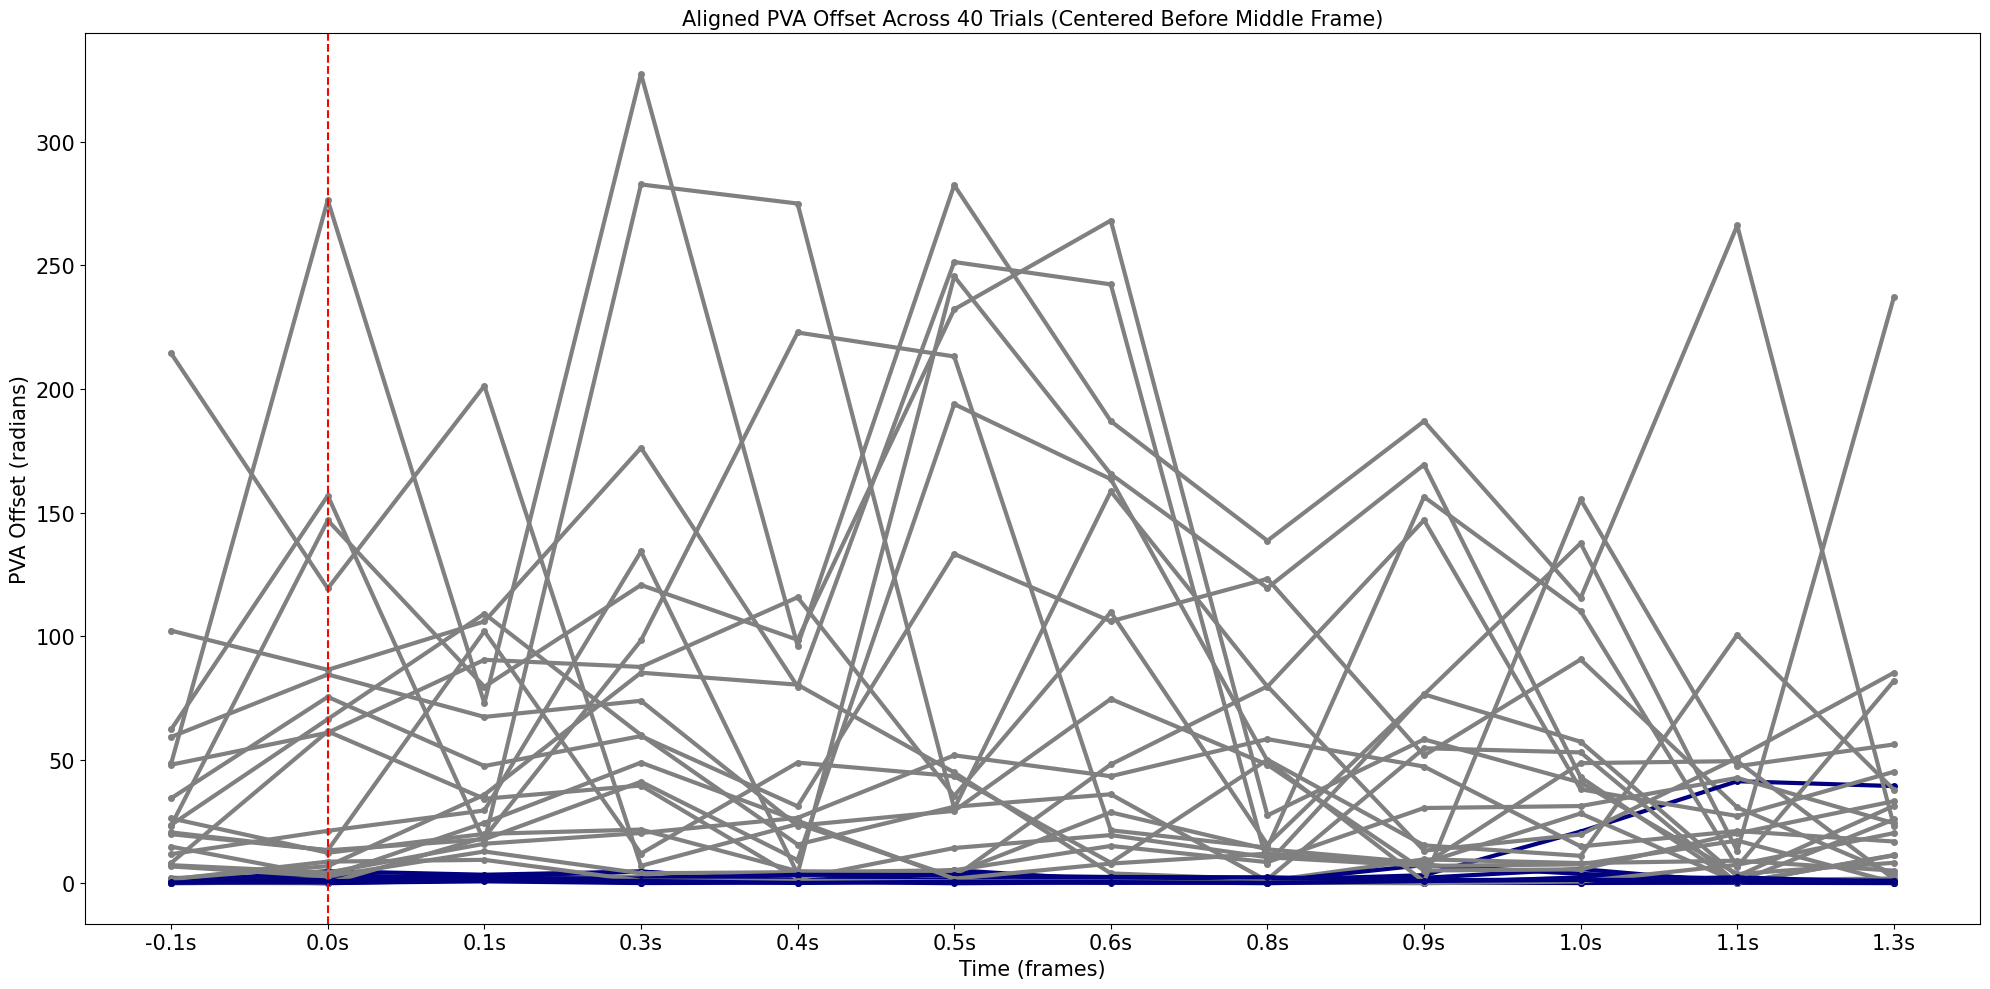

In [21]:


# Assuming test['output_bar_PVA_offset_pooled'] is your 40x185 dataframe
data = jump_data['Angular_speed']


# Define the middle frame and the range around it
middle_frame = int((data.shape[1]-1)/2) + 1

# Get the value of the frame just before the middle frame for each trial
frame_before_middle = middle_frame - 1
frame_before_middle_values = data.iloc[:, frame_before_middle]




# Define the range to plot (20 frames before and after the middle frame)
plot_start_frame = middle_frame - 1
plot_end_frame = middle_frame + 10 + 1  # +1 to include the end frame

data = data.values

# Plot each aligned trial within the specified range
plt.figure(figsize=(20, 10))
for i in range(data.shape[0]):
    if int(jump_data['output_bar_jumping_stop_stamp_pooled'][0][i]) == 0 :
        plt.plot(range(-1, 11), data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'navy')
    else:
        plt.plot(range(-1, 11  ), data[i, plot_start_frame:plot_end_frame], label=f'Trial {i+1}',linewidth=3, linestyle='-', marker='o', markersize=4, color = 'gray')

# Add titles and labels
plt.title('Aligned PVA Offset Across 40 Trials (Centered Before Middle Frame)',fontsize = 15)
plt.xlabel('Time (frames)',fontsize = 15)  # Change the x-axis label to represent frames
plt.ylabel('PVA Offset (radians)',fontsize = 15)


# Set custom tick labels for the x-axis
frame_labels = [f'{(frame - middle_frame) * volume_time:.1f}s' for frame in range(plot_start_frame, plot_end_frame)]
plt.xticks(range(-1, 11), frame_labels, fontsize = 15)
plt.yticks(fontsize = 15)

# Add a vertical line at the middle frame
plt.axvline(x=0, color='r', linestyle='--', label='Middle Frame')

# Show the plot
plt.tight_layout()
plt.show()